In [9]:
from braket.tracking import Tracker
t = Tracker().start()

In [10]:
# general imports
import matplotlib.pyplot as plt
import numpy as np
# magic word for producing visualizations in notebook
%matplotlib inline
import string
import time

# AWS imports: Import Braket SDK modules
from braket.aws import AwsDevice, AwsQuantumTask
from braket.circuits import Circuit, Gate, observables
from braket.device_schema import DeviceActionType
from braket.devices import Devices, LocalSimulator
from braket.parametric import FreeParameter
from braket.error_mitigation import Debias

In [11]:
aria1 = AwsDevice(Devices.IonQ.Aria1)
supported_gates = aria1.properties.action[DeviceActionType.OPENQASM].supportedOperations
# print the supported gate set
print('Gate set supported by the IonQ device:\n', supported_gates)
print('\n') 

Gate set supported by the IonQ device:
 ['x', 'y', 'z', 'rx', 'ry', 'rz', 'h', 'cnot', 's', 'si', 't', 'ti', 'v', 'vi', 'xx', 'yy', 'zz', 'swap']




In [12]:
# Define a circuit

nqubits=3
nshots=2500

circ = Circuit()

circ.ry(0, 0)
circ.rz(0, 0.36959914)
circ.ry(1, 0.73919827)
circ.rz(1, 1.10879741)
circ.ry(2, 1.47839654)
circ.rz(2, 1.84799568)
circ.cnot(0, 1)
circ.cnot(1, 2)
circ.ry(0, 2.21759481)
circ.rz(0, 2.58719395)
circ.ry(1, 2.95679309)
circ.rz(1, 3.32639222)
circ.ry(2, 3.69599136)
circ.rz(2, 4.06559049)
circ.cnot(0, 1)
circ.cnot(1, 2)
circ.ry(0, 4.43518963)
circ.rz(0, 4.80478876)
circ.ry(1, 5.1743879)
circ.rz(1, 5.54398704)
circ.ry(2, 5.91358617)
circ.rz(2, 6.28318531)
circ.cnot(0, 1)
circ.cnot(1, 2)

Circuit('instructions': [Instruction('operator': Ry('angle': 0.0, 'qubit_count': 1), 'target': QubitSet([Qubit(0)]), 'control': QubitSet([]), 'control_state': (), 'power': 1), Instruction('operator': Rz('angle': 0.36959914, 'qubit_count': 1), 'target': QubitSet([Qubit(0)]), 'control': QubitSet([]), 'control_state': (), 'power': 1), Instruction('operator': Ry('angle': 0.73919827, 'qubit_count': 1), 'target': QubitSet([Qubit(1)]), 'control': QubitSet([]), 'control_state': (), 'power': 1), Instruction('operator': Rz('angle': 1.10879741, 'qubit_count': 1), 'target': QubitSet([Qubit(1)]), 'control': QubitSet([]), 'control_state': (), 'power': 1), Instruction('operator': Ry('angle': 1.47839654, 'qubit_count': 1), 'target': QubitSet([Qubit(2)]), 'control': QubitSet([]), 'control_state': (), 'power': 1), Instruction('operator': Rz('angle': 1.84799568, 'qubit_count': 1), 'target': QubitSet([Qubit(2)]), 'control': QubitSet([]), 'control_state': (), 'power': 1), Instruction('operator': CNot('qubi

In [13]:
print(circ)

T  : │     0      │     1      │  2  │     3      │     4      │     5      │  6  │     7      │     8      │     9      │ 10  │ 11  │
       ┌───────┐   ┌──────────┐       ┌──────────┐ ┌──────────┐                    ┌──────────┐ ┌──────────┐                          
q0 : ──┤ Ry(0) ├───┤ Rz(0.37) ├───●───┤ Ry(2.22) ├─┤ Rz(2.59) ├────────────────●───┤ Ry(4.44) ├─┤ Rz(4.80) ├────────────────●─────────
       └───────┘   └──────────┘   │   └──────────┘ └──────────┘                │   └──────────┘ └──────────┘                │         
      ┌──────────┐ ┌──────────┐ ┌─┴─┐              ┌──────────┐ ┌──────────┐ ┌─┴─┐              ┌──────────┐ ┌──────────┐ ┌─┴─┐       
q1 : ─┤ Ry(0.74) ├─┤ Rz(1.11) ├─┤ X ├──────●───────┤ Ry(2.96) ├─┤ Rz(3.33) ├─┤ X ├──────●───────┤ Ry(5.17) ├─┤ Rz(5.54) ├─┤ X ├───●───
      └──────────┘ └──────────┘ └───┘      │       └──────────┘ └──────────┘ └───┘      │       └──────────┘ └──────────┘ └───┘   │   
      ┌──────────┐ ┌──────────┐          ┌─┴─┐     ┌───

In [14]:
# run circuit (execute single TASK)
aria1_task = aria1.run(circ, shots=nshots, device_parameters={"errorMitigation": Debias()})

In [19]:
# get id and status of submitted quantum task
aria1_task_id = aria1_task.id
aria1_status = aria1_task.state()
# print('ID of quantum task:', aria1_task_id)
print('Status of quantum task:', aria1_status)

Status of quantum task: RUNNING


Status of (reconstructed) quantum task: COMPLETED


2500 shots taken on machine arn:aws:braket:us-east-1::device/qpu/ionq/Aria-1.

Measurement counts: {'000': 154, '001': 633, '010': 102, '011': 717, '100': 79, '101': 161, '110': 186, '111': 468}


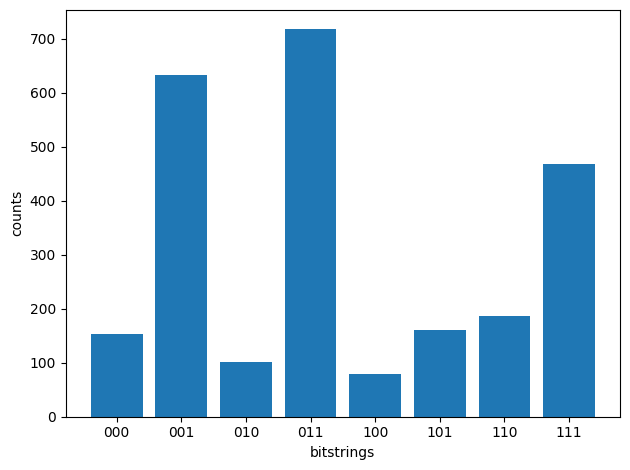

In [24]:
# recover quantum task
task_load = AwsQuantumTask(arn=aria1_task_id)

# print status
status = task_load.state()
print('Status of (reconstructed) quantum task:', status)
print('\n')
# wait for job to complete
# terminal_states = ['COMPLETED', 'FAILED', 'CANCELLED']
if status == 'COMPLETED':
    # get results
    aria1_results = task_load.result()
    # print(aria1_results)
    
    # get all metadata of submitted quantum task
    metadata = task_load.metadata()
    # example for metadata
    shots = metadata['shots']
    machine = metadata['deviceArn']
    # print example metadata
    print("{} shots taken on machine {}.\n".format(shots, machine))
    
    # get measurement counts
    aria1_counts = dict(sorted(aria1_results.measurement_counts.items()))

    print('Measurement counts:', aria1_counts)

    # plot results: see effects of noise
    plt.bar(aria1_counts.keys(), aria1_counts.values())
    plt.xlabel('bitstrings')
    plt.ylabel('counts')
    plt.tight_layout()
    plt.savefig('aria1.png', dpi=700)
    
elif status in ['FAILED', 'CANCELLED']:
    # print terminal message 
    print('Your quantum task is in terminal status, but has not completed.')

else:
    # print current status
    print('Sorry, your quantum task is still being processed and has not been finalized yet.')